# Conda OpenTURNS downloads statistics 

## References

https://www.anaconda.com/blog/get-python-package-download-statistics-with-condastats

## Installation

    conda install -c conda-forge condastats pandas

In [1]:
import subprocess
import pandas as pd
import pylab as pl

In [2]:
# !condastats overall openturns

In [3]:
result = subprocess.run(["condastats", "overall" , "--monthly", "openturns"], stdout=subprocess.PIPE)
print(result.stdout)

b'pkg_name   time   \nopenturns  2017-03        8.0\n           2017-04      882.0\n           2017-05      532.0\n           2017-06     1126.0\n           2017-07      867.0\n           2017-08      548.0\n           2017-09      243.0\n           2017-10      503.0\n           2017-11      666.0\n           2017-12     1042.0\n           2018-01     1224.0\n           2018-02     2448.0\n           2018-03     1143.0\n           2018-04     1486.0\n           2018-05     1250.0\n           2018-06     3358.0\n           2018-07     5823.0\n           2018-08     7284.0\n           2018-09     5545.0\n           2018-10     8173.0\n           2018-11     7063.0\n           2018-12    17430.0\n           2019-01     3404.0\n           2019-02     2424.0\n           2019-03     1945.0\n           2019-04     1253.0\n           2019-05     2896.0\n           2019-06     2624.0\n           2019-07     2334.0\n           2019-08     1916.0\n           2019-09     1108.0\n           2019-1

In [4]:
otstats = result.stdout

In [5]:
data = otstats.split()
data[:10]

[b'pkg_name',
 b'time',
 b'openturns',
 b'2017-03',
 b'8.0',
 b'2017-04',
 b'882.0',
 b'2017-05',
 b'532.0',
 b'2017-06']

In [6]:
index = 3
values = []
monthList = []
while index < len(data) - 4:
    month = data[index].decode('UTF-8')
    monthList.append(month)
    downloads = float(data[index + 1]) / 1000.0
    values.append(downloads)
    print(month, downloads)
    index += 2

2017-03 0.008
2017-04 0.882
2017-05 0.532
2017-06 1.126
2017-07 0.867
2017-08 0.548
2017-09 0.243
2017-10 0.503
2017-11 0.666
2017-12 1.042
2018-01 1.224
2018-02 2.448
2018-03 1.143
2018-04 1.486
2018-05 1.25
2018-06 3.358
2018-07 5.823
2018-08 7.284
2018-09 5.545
2018-10 8.173
2018-11 7.063
2018-12 17.43
2019-01 3.404
2019-02 2.424
2019-03 1.945
2019-04 1.253
2019-05 2.896
2019-06 2.624
2019-07 2.334
2019-08 1.916
2019-09 1.108
2019-10 3.701
2019-11 3.476
2019-12 4.853
2020-01 4.123
2020-02 4.638
2020-03 2.993
2020-04 19.419


In [7]:
df = pd.DataFrame(data=values, index=monthList, columns=["Downloads x1000"])

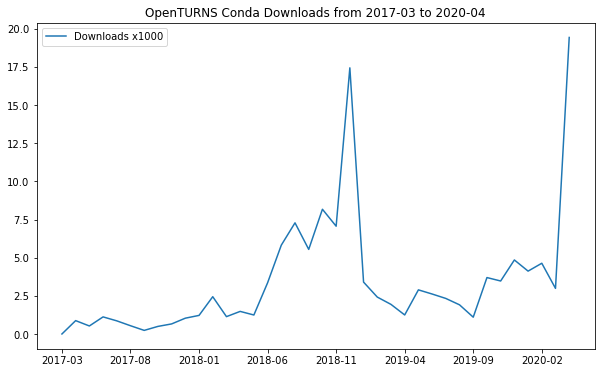

In [8]:
df.plot(figsize=(10,6));
pl.title("OpenTURNS Conda Downloads from %s to %s" % (monthList[0], monthList[-1]));
pl.savefig("openturns-conda-downloads.png")